<a href="https://colab.research.google.com/github/muqadasrao/Prodigy-InfoTech_DS_Internship-/blob/main/House_price_Prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [40]:
#Create a synthetic dataset (for the sake of this example)
data = {
    'square_footage': [1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000],
    'bedrooms': [3, 4, 3, 4, 5, 5, 6, 6],
    'price': [400000, 450000, 500000, 600000, 650000, 700000, 750000, 800000]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
df.head()


,square_footage,bedrooms,price
0,1500,3,400000
1,1800,4,450000
2,2400,3,500000
3,3000,4,600000
4,3500,5,650000


In [41]:
#Split the data
X = df[['square_footage', 'bedrooms']]  # Features
y = df['price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)


In [43]:
#Evaluate Linear Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# Print the evaluation metrics for Linear Regression
print(f"Linear Regression - MSE: {mse_linear}, MAE: {mae_linear}")





Linear Regression - MSE: 19509572.697003428, MAE: 3225.582685904519


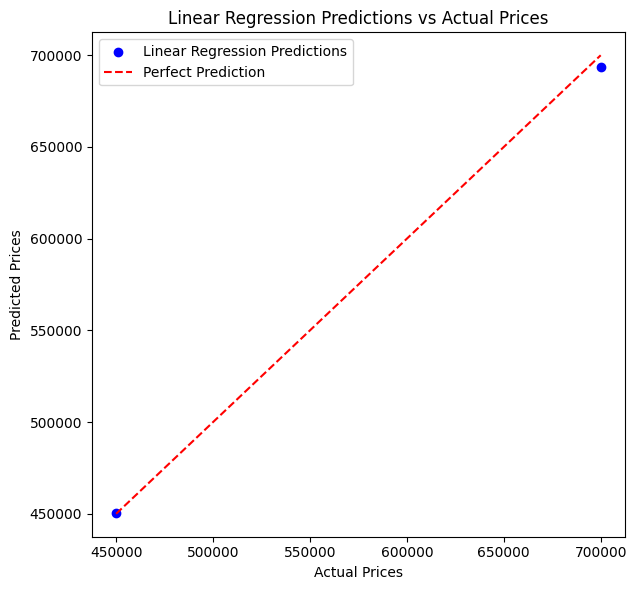

In [44]:
# Step 7: Visualization
plt.figure(figsize=(12, 6))

# Plotting Linear Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Linear Regression Predictions vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()

plt.tight_layout()
plt.show()


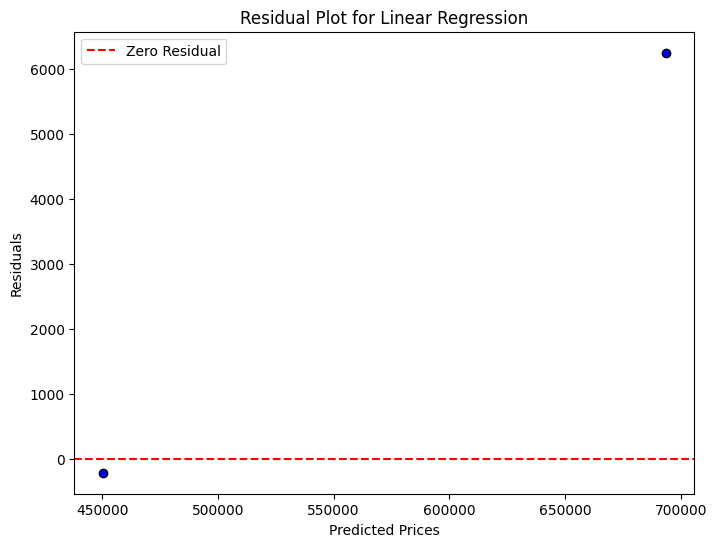

In [45]:
#Residual Plot for Linear Regression
residuals = y_test - y_pred_linear

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_linear, residuals, color='blue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()


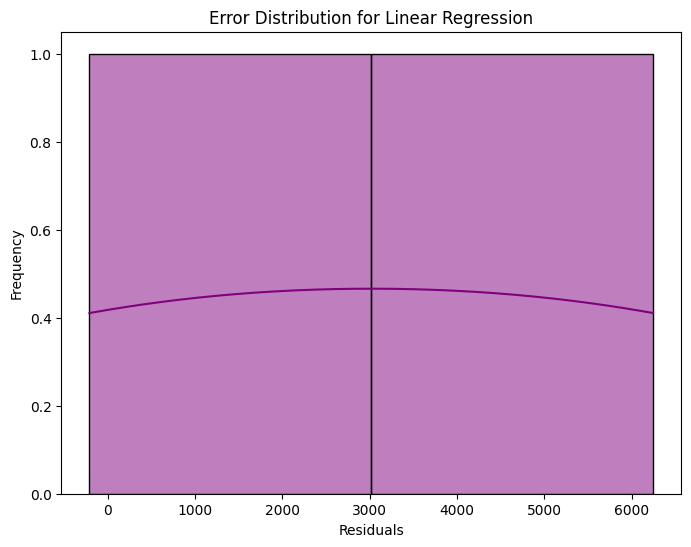

In [46]:
#Error Distribution Plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Error Distribution for Linear Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [48]:
# Step 9: Predict house price for new property
new_property = pd.DataFrame({'square_footage': [200], 'bedrooms': [6]})

linear_prediction = linear_model.predict(new_property)

print(f"Predicted Price for the new property (Linear Regression): ${linear_prediction[0]:,.2f}")



Predicted Price for the new property (Linear Regression): $293,854.05
